Q1: Trong một trò chơi cá cược. Mỗi lượt chơi, bạn chỉ được đặt cược $1. Nếu bạn thắng, bạn sẽ nhận được
$1, nếu bạn thua bạn bị mất đi $1. Giả sử xác suất để bạn có thắng ở mỗi ván là p và xác suất bạn bị thua là
q = 1−p. Gọi W0 là số tài sản ban đầu. Trò chơi sẽ kết thúc khi tài sản của bạn bằng 0 hoặc tài sản của bạn đạt
đến một số N cho trước. Hãy viết chương trình mô phỏng, tính toán lại những yêu cầu sau biết rằng: W0 = $20



(1) Tính xác suất bạn ra về tay trắng tương ứng với p = 0.25, 0.5, 0.75

In [15]:
import numpy as np
import scipy.stats as st
from scipy.stats import bernoulli

In [87]:
def simulator(nTrials, p, W0, N):
   """
   Param:
         p (float): Xác suất thắng mỗi lượt.
         W0 (int): Tài sản ban đầu.
         N (int): Mục tiêu (thắng).
         nTrials (int): Số lượng ván chơi.

   Return:
         lossRound: số ván dừng do thua trắng tay.
         winRound: số ván dừng do đạt được mục tiêu.
   """
   Wcurrent = W0
   winRound = 0
   lossRound = 0
   for i in range(nTrials):    
      while Wcurrent > 0 and Wcurrent <N:
         Wcurrent += 2.0*st.bernoulli.rvs(p) - 1.0 
      if Wcurrent == 0:
         lossRound +=1
      else:
         winRound +=1
      Wcurrent = W0
   return lossRound, winRound

In [95]:
nTrials = 100
W0 = 20
N = 100
pList = [0.25, 0.5, 0.75]
for p in pList:
    lossRound, winRound = simulator(nTrials, p, W0, N)
    print("total: ", lossRound + winRound, " win: ",  winRound, " loss: ", lossRound)
    lossProbability = lossRound/(winRound + lossRound)
    print(f"Xác suất thua trắng tay với p = {p:.2f} (sau {nTrials} ván chơi): {lossProbability:.4f}")


total:  100  win:  0  loss:  100
Xác suất thua trắng tay với p = 0.25 (sau 100 ván chơi): 1.0000
total:  100  win:  21  loss:  79
Xác suất thua trắng tay với p = 0.50 (sau 100 ván chơi): 0.7900
total:  100  win:  100  loss:  0
Xác suất thua trắng tay với p = 0.75 (sau 100 ván chơi): 0.0000


(2) Tính xác suất bạn thắng được N = $100, với p = 0.25, 0.5, 0.75


In [96]:
for p in pList:
    lossRound, winRound = simulator(nTrials, p, W0, N)
    print("total: ", lossRound + winRound, " win: ",  winRound, " loss: ", lossRound)
    lossProbability = winRound/(winRound + lossRound)
    print(f"Xác suất thắng đậm với 100$ với p = {p:.2f} (sau {nTrials} ván chơi): {lossProbability:.4f}")

total:  100  win:  0  loss:  100
Xác suất thắng đậm với 100$ với p = 0.25 (sau 100 ván chơi): 0.0000
total:  100  win:  21  loss:  79
Xác suất thắng đậm với 100$ với p = 0.50 (sau 100 ván chơi): 0.2100
total:  100  win:  100  loss:  0
Xác suất thắng đậm với 100$ với p = 0.75 (sau 100 ván chơi): 1.0000


(3) Nhận xét sự tương quan giữa tài sản khởi đầu và xác suất ra về tay trắng tương ứng với p = 0.25, 0.5, 0.75


In [110]:
pList = [0.25, 0.5, 0.75]
correlP = []
for p in pList:
    WList = list(range(20, 25))
    probabilityList = []
    for W0 in WList:
        nTrials = 100
        N = 100
        lossRound, winRound = simulator(nTrials, p, W0, N)
        lossProbability = lossRound/(winRound + lossRound)
        probabilityList.append(lossProbability)
    correlP.append(probabilityList)

In [131]:
import seaborn as sns

wRange = [float(i) for i in range(20, 25)]

correlation = np.corrcoef(wRange, correlP[0])[0, 1]


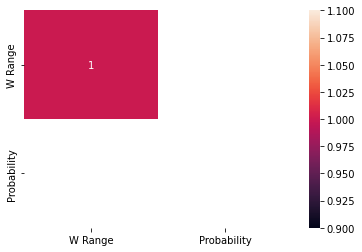

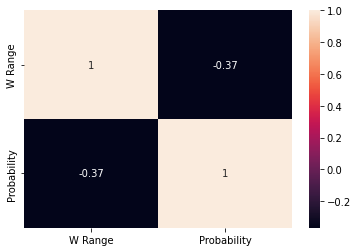

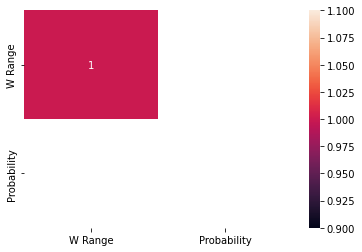

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
for i, p in enumerate(pList):
    df = pd.DataFrame({'W Range': wRange, 'Probability': correlP[i]})
    sns.heatmap(df.corr(), annot=True)
    plt.show()

(4) Viết chương trình tính xác bạn ra về tay trắng với W0 = $100 và xác suất p nằm trong khoảng từ 0.1
đến 0.9